# RATINGS PREDICTION PROJECT

### Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps mentioned below:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the Best ML model

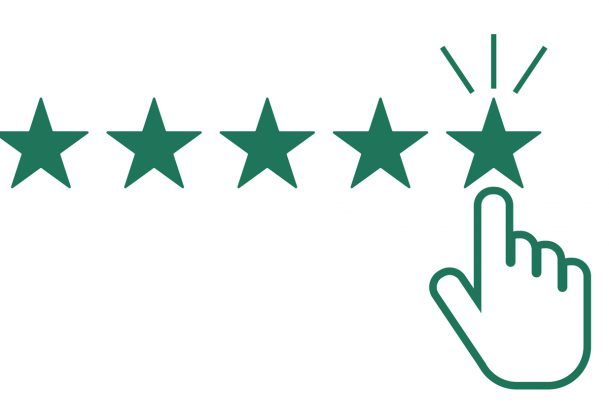

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

Importing all the necessary libraries/packages here.

In [2]:
df = pd.read_csv("Review_Rating_file.csv")
df # checking the first five and last five rows of our dataset

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
...,...,...,...,...
77545,77545,Nice product,good product,4
77546,77546,Awesome,Very good as expected and happy with the purchase,5
77547,77547,Awesome,I love it! No complaint!,5
77548,77548,Nice product,good product,4


Column Information:
- Review_title : title of the review
- Review_text : content of the review text
- Ratings : ratings are out of 5 stars

First I will drop the unwanted column "Unnamed: 0" from our dataset as it holds meaning less index information.

# Exploratory Data Analysis

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 77550 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
5,Battery life,\n Battery backup give only one hour . What d...,2.0 out of 5 stars
6,No for professional works,\n Blue screen while power on the linux Opera...,2.0 out of 5 stars
7,monitor power issue,\n monitor is not turning on from 2 weeks of ...,2.0 out of 5 stars
8,waste,\n waste of money sometimes screen was marks\n,2.0 out of 5 stars
9,Not able to download warranty card,\n Good\n,2.0 out of 5 stars


It looks like our dataframe has 77550 Rows and 3 Columns but we do observe some NaN values that will need to be removed to clean our dataset and make it free from missing values.

In [4]:
df.isna().sum() # checking for missing values

Review_title    9029
Review_text     8085
Ratings         9027
dtype: int64

Using the `isna` and `sum` options together we can confirm that there some missing values in all the 3 columns of our dataset that will need to be treated.

<AxesSubplot:>

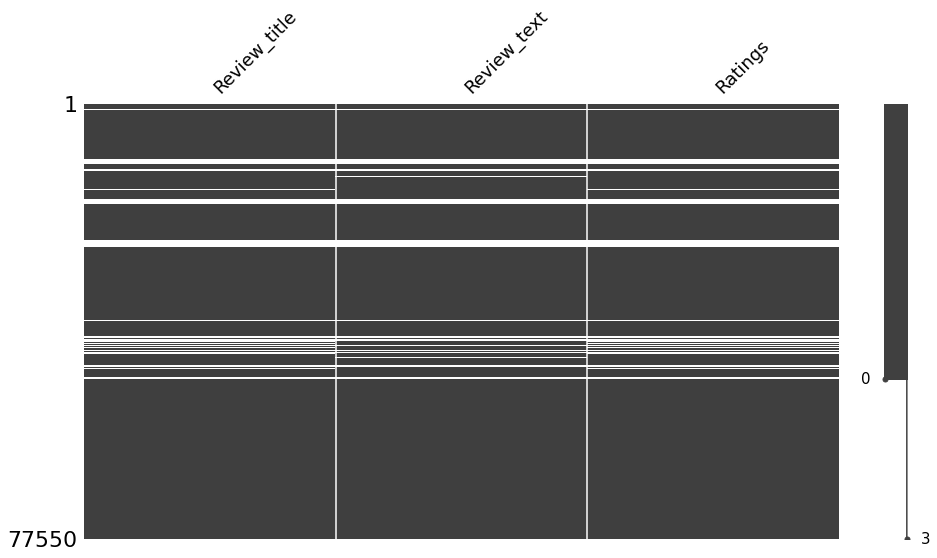

In [5]:
missingno.matrix(df, figsize = (15,8), fontsize=18)

Was just ensuring the missing data information with the help of a visual using `missingno`. We can see that the above white lines represent the NaN values present in our dataframe that will need to be removed.

In [6]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 77550 Rows and 3 Columns in our dataframe before removing NaN
We have 68294 Rows and 3 Columns in our dataframe after removing NaN


In [7]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

Great looks like we were able to successfully remove all the missing data and the new dataframe has 68294 Rows and 3 Columns in it.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68294 entries, 0 to 77549
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  68294 non-null  object
 1   Review_text   68294 non-null  object
 2   Ratings       68294 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


Using the `info` method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [9]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '1', '4', '3',
       '2'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [10]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.

In [11]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Suitable for School kids,\n If you are a College student or a professi...,2,Suitable for School kids \n If you are a Coll...
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2,The sold me renewed laptop \n It’s look like ...
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2,Amazon dupes with specification/ battery sucks...
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2,Display back light issue \n Display gone with...
...,...,...,...,...
77545,Nice product,good product,4,Nice product good product
77546,Awesome,Very good as expected and happy with the purchase,5,Awesome Very good as expected and happy with t...
77547,Awesome,I love it! No complaint!,5,Awesome I love it! No complaint!
77548,Nice product,good product,4,Nice product good product


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

### Visualizing text in first three rows from the newly created "Review" column

In [12]:
df['Review'][0]

'Suitable for School kids \n  If you are a College student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you. It hangs more often than it runs. Cannot install essential computer science software such as Eclipse or android studio because then this laptop just dies.<br><br>I took this laptop thinking that it will have good performance based on its configuration.<br><br>But if you are someone who wants to attend online classes or just browse, then you may go for this laptop.\n'

In [13]:
df['Review'][1]

'Misrepresentation on MS Office 2019 license - it is one month trial \n  Update after one month usage - MS Office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate. HP support shared their product sheet that stated that this laptop came only with a trial version of MS Office 2019. Now I am chasing seller Appario Retail to honour the commitment.<br><br>Bad experience after paying high price (around ₹67,000) for preinstalled genuine software.<br><br>Other wise product has sleek looks, superfast fingerprint scanner, very good display, very responsive touchpad, decent (but tinny) speakers, USB C and barrel plug charging options and under 10 second boot up (SSD drive). Preloaded with Win10 Home and MS Office (not sure whether trial or full version). Drawbacks - weighs 1.42 kg, base gets warm rather quickly and so does the power adapter. Decent for a college student.\n'

In [14]:
df['Review'][2]

'The sold me renewed laptop \n  It’s look like renewed laptop because laptop charging jack is loose and left side speaker sounds like it’s tear. Bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any Chinese phone touch. Waste of money and one more thing day by day Amazon product quality getting poor\n'

### Text Processing to remove unwanted punctuations and special characters

In [15]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [16]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Visualizing text in first three rows after applying various text cleaning procedures

In [17]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop dies took laptop thinking good performance based configuration someone wants attend online classes browse may go laptop'

In [18]:
df['Review'][1]

'misrepresentation ms office 2019 license one month trial update one month usage ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate hp support shared product sheet stated laptop came trial version ms office 2019 chasing seller appario retail honour commitment bad experience paying high price around 67000 preinstalled genuine software wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options 10 second boot ssd drive preloaded win10 home ms office sure whether trial full version drawbacks weighs 142 kg base gets warm rather quickly power adapter decent college student'

In [19]:
df['Review'][2]

'sold renewed laptop look like renewed laptop laptop charging jack loose left side speaker sounds like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality getting poor'

### Lemmatization

In [20]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [21]:
df['Review'][0]

'suitable school kid college student professional depend heavily laptop pretty much everyday laptop hang often run can not install essential computer science software eclipse android studio laptop dy take laptop thinking good performance base configuration someone want attend online class browse may go laptop'

In [22]:
df['Review'][1]

'misrepresentation m office 2019 license one month trial update one month usage m office 2019 preinstalled edition become unlicensed version within 30 day refuse activate hp support share product sheet state laptop come trial version m office 2019 chase seller appario retail honour commitment bad experience pay high price around 67000 preinstalled genuine software wise product sleek look superfast fingerprint scanner good display responsive touchpad decent tinny speaker usb c barrel plug charge option 10 second boot ssd drive preloaded win10 home m office sure whether trial full version drawback weigh 142 kg base get warm rather quickly power adapter decent college student'

In [23]:
df['Review'][2]

'sell renew laptop look like renew laptop laptop charge jack loose leave side speaker sound like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality get poor'

### Text Normalization - Standardization

In [24]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [25]:
df['Review'][0]

'suitable school kid college student professional depend heavily laptop pretty much everyday laptop hang often run can not install essential computer science software eclipse android studio laptop dy take laptop thinking good performance base configuration someone want attend online class browse may go laptop'

In [26]:
df['Review'][1]

'misrepresentation m office  license one month trial update one month usage m office  preinstalled edition become unlicensed version within  day refuse activate hp support share product sheet state laptop come trial version m office  chase seller appario retail honour commitment bad experience pay high price around  preinstalled genuine software wise product sleek look superfast fingerprint scanner good display responsive touchpad decent tinny speaker usb c barrel plug charge option  second boot ssd drive preloaded win home m office sure whether trial full version drawback weigh  kg base get warm rather quickly power adapter decent college student'

In [27]:
df['Review'][2]

'sell renew laptop look like renew laptop laptop charge jack loose leave side speaker sound like tear bad sound quality finger sensor quality look like  touch phone wing chinese phone touch waste money one thing day day amazon product quality get poor'

### Word Counts

In [28]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,44,suitable school kid college student profession...
1,103,misrepresentation m office license one month ...
2,43,sell renew laptop look like renew laptop lapto...
3,21,amazon dupe specification battery suck nbspi s...
4,16,display back light issue display go month any...
5,7,battery life battery backup give one hour
6,18,professional work blue screen power linux oper...
7,8,monitor power issue monitor turn week purchase
8,6,waste waste money sometimes screen mark
9,5,able download warranty card good


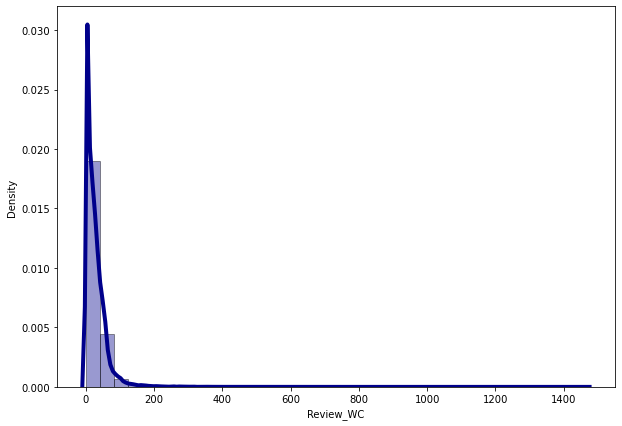

In [29]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### Character Counts

In [30]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,309,suitable school kid college student profession...
1,654,misrepresentation m office license one month ...
2,250,sell renew laptop look like renew laptop lapto...
3,126,amazon dupe specification battery suck nbspi s...
4,102,display back light issue display go month any...
5,41,battery life battery backup give one hour
6,125,professional work blue screen power linux oper...
7,47,monitor power issue monitor turn week purchase
8,39,waste waste money sometimes screen mark
9,32,able download warranty card good


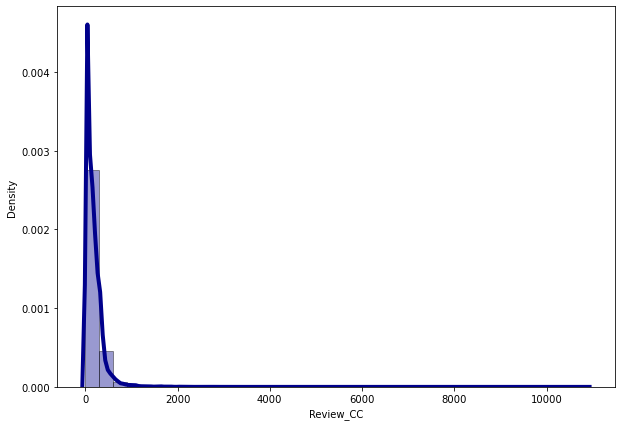

In [31]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

### Removing Outliers

In [32]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 67260 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only around 1000 entries which is acceptable here for getting better results for our model.

# Visualization

### Plotting histograms for word count and character count again after removing the outliers

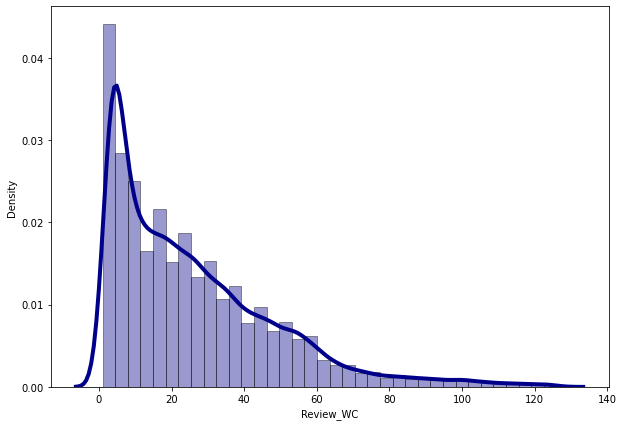

In [34]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

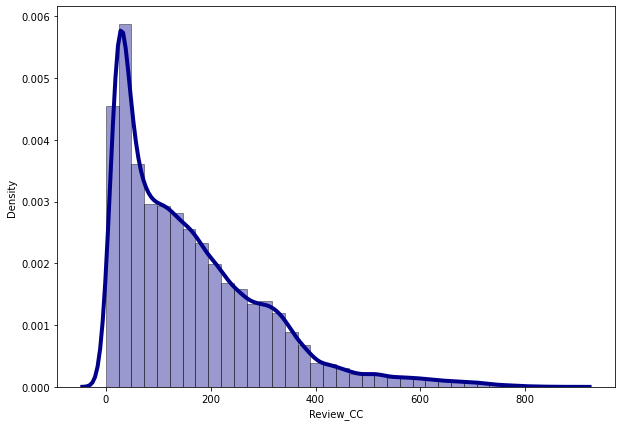

In [35]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

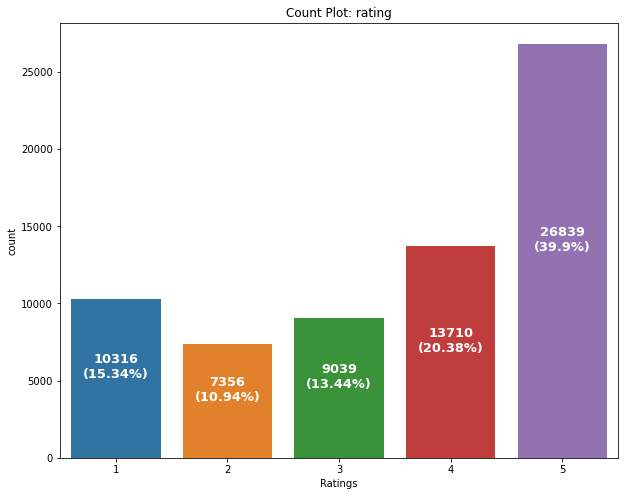

In [36]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:
- We can see that the highest number of customer rating received are for 5 stars
- Then we have 4 star rating reviews present in our dataset
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

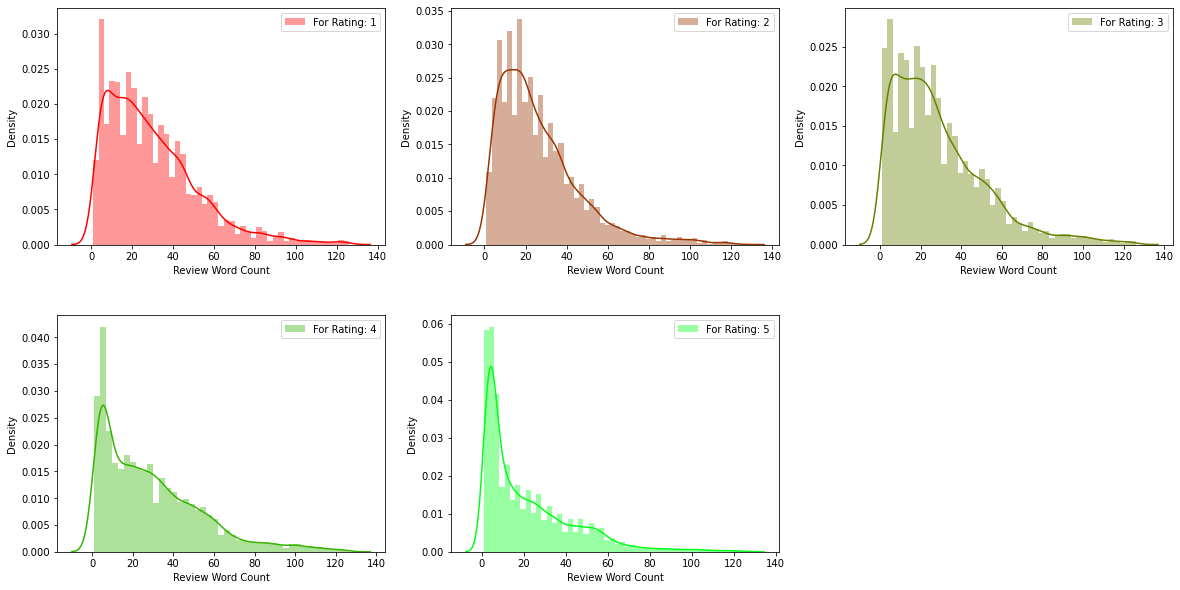

In [37]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

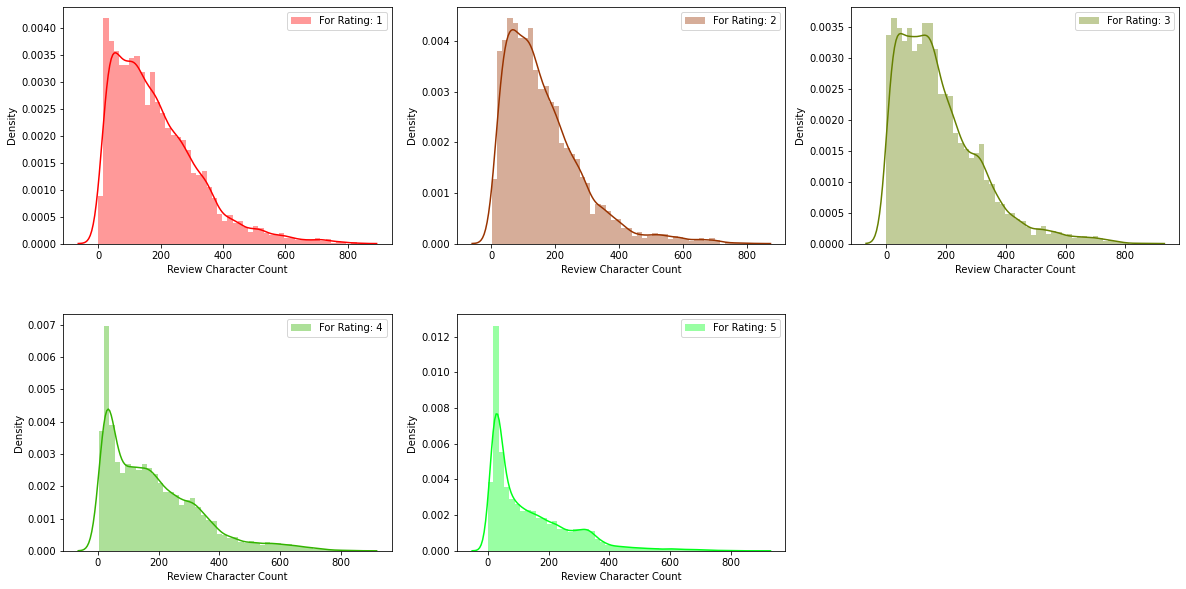

In [38]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

### Displaying loud words with Word Cloud information

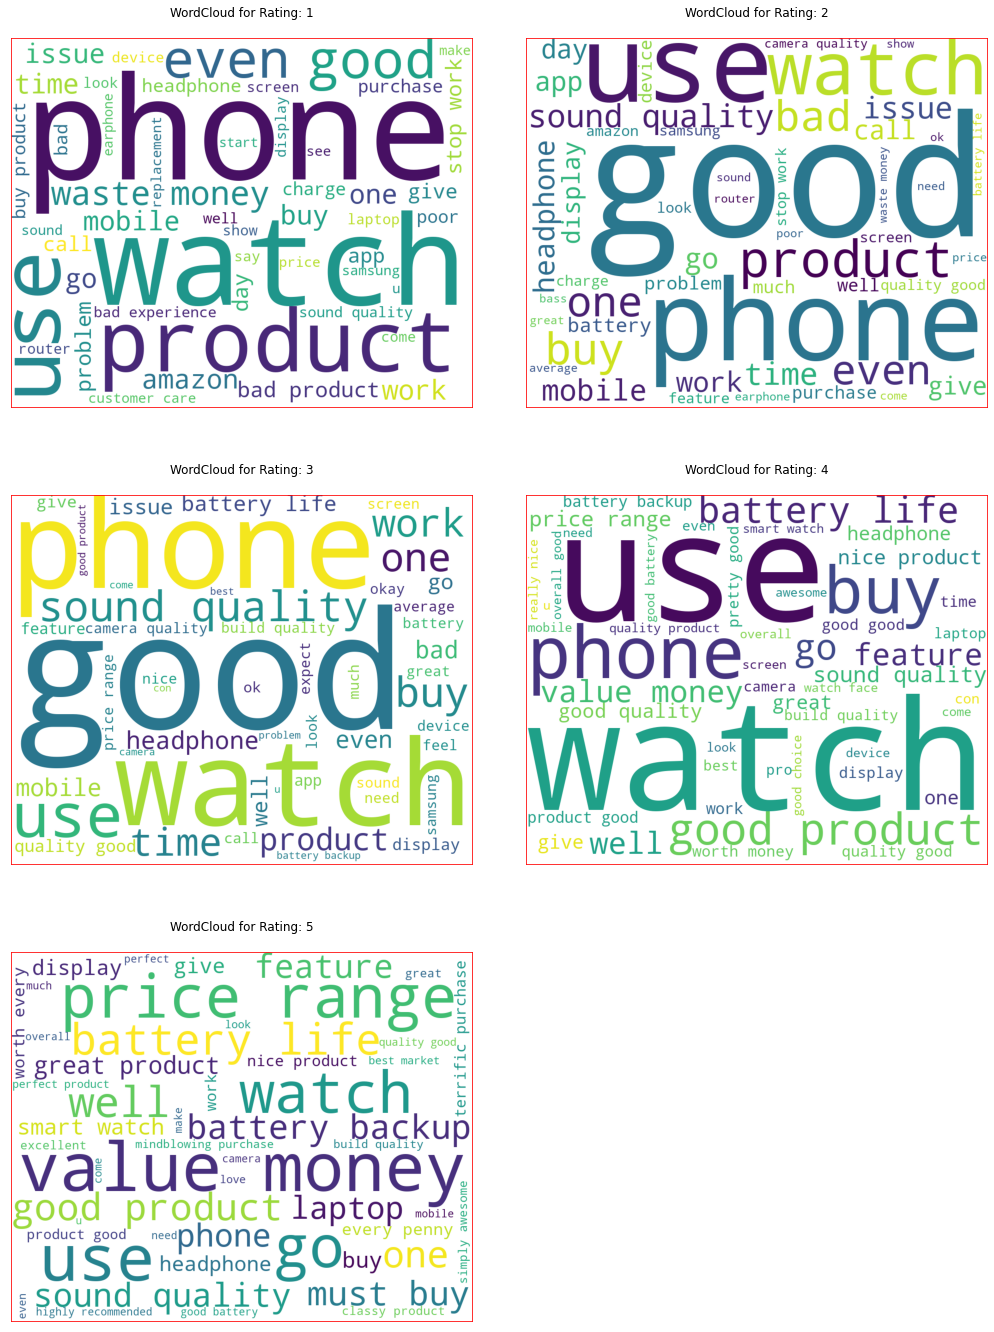

In [39]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

Observation:

`For Rating: 1`
- It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

`For Rating: 2`
- It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

`For Rating: 3`
- It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

`For Rating: 4`
- It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

`For Rating: 5`
- It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    26839
4    13710
1    10316
3     9039
2     7356
Name: Ratings, dtype: int64


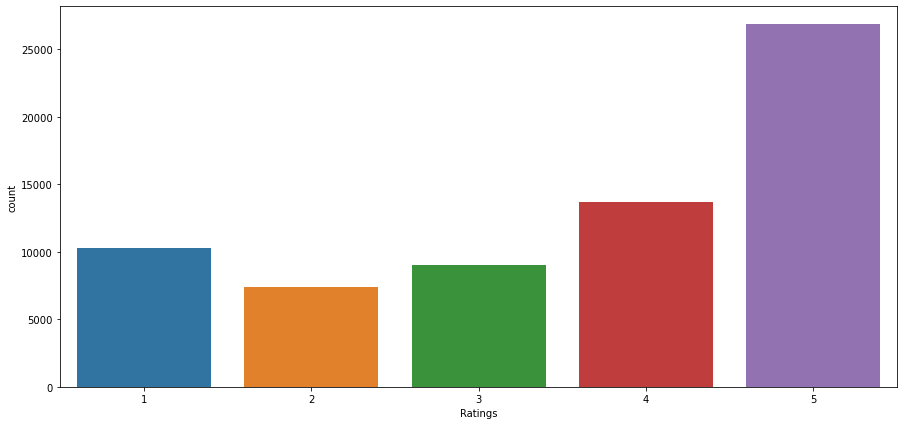

In [40]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
- Which will cause the **Imbalance** problem for our Machine Learning model and make it bias.
- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
- Then I will select equal number of data of every category and ensure that the rating values are balanced

In [41]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Quality Product at reasonable price. Happy to ...,\n I did lots of research to purchase a good ...,5,quality product reasonable price happy buy lot...,28,189
1,Do not buy products from Noise. It's an absolu...,\n It's just a crappy Product. Too many negat...,1,buy product noise absolute crap waste crappy p...,49,309
2,Product is good but the seller 👎,\n It's been a week since I started using the...,4,product good seller week since start use produ...,78,513
3,Not the best one out there,\n Well 300mbps router should cover a house w...,2,best one well mbps router cover house sft nah...,26,133
4,Overpriced,\n Very much Over Priced. Waited so long for ...,1,overprice much price wait long as see ag much ...,13,76
...,...,...,...,...,...,...
67255,Sound ok but quality not,\n The product is ok as per the segment price...,3,sound ok quality product ok per segment price ...,17,102
67256,Auto restart problem .... Very disappointed,\n Phone has auto restart problem it's been 2...,1,auto restart problem disappoint phone auto res...,27,172
67257,Terrific purchase,Worth product under 1000 must buy this phone,5,terrific purchase worth product must buy phone,8,47
67258,Good for some days then it starts failing,\n The watch design and comfort is excellent ...,1,good day start fail watch design comfort excel...,45,271


In [42]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Finger print quality,\n Please improve finger print quality\n,3,finger print quality please improve finger pri...,8,56
1,50-50% Rating for this Oppo model,"\n +points:-screen , colour, exterior feature...",3,rating oppo model pointsscreen colour exterior...,25,179
2,Hated it!,Good design but it's not support properly by n...,1,hat good design support properly noise app noi...,14,83
3,Just wow!,Very good smartphone working very good battery...,5,wow good smartphone work good battery awesome ...,15,100
4,Average,\n I expect fingers print reader should be on...,3,average expect finger print reader screen back...,16,105
...,...,...,...,...,...,...
36775,Good,Good product quality but battery is very worst...,3,good good product quality battery worst day,8,44
36776,Defective Product,\n This product has stopped working (not gett...,1,defective product product stop work get turn w...,32,218
36777,Wires are so thin,\n The wires are very thin so you need to be ...,3,wire thin wire thin need careful handle wire b...,30,171
36778,No blood pressure measurement option,\n Worst watch when i searched for it it show...,1,blood pressure measurement option bad watch se...,36,265


3    7356
1    7356
5    7356
2    7356
4    7356
Name: Ratings, dtype: int64


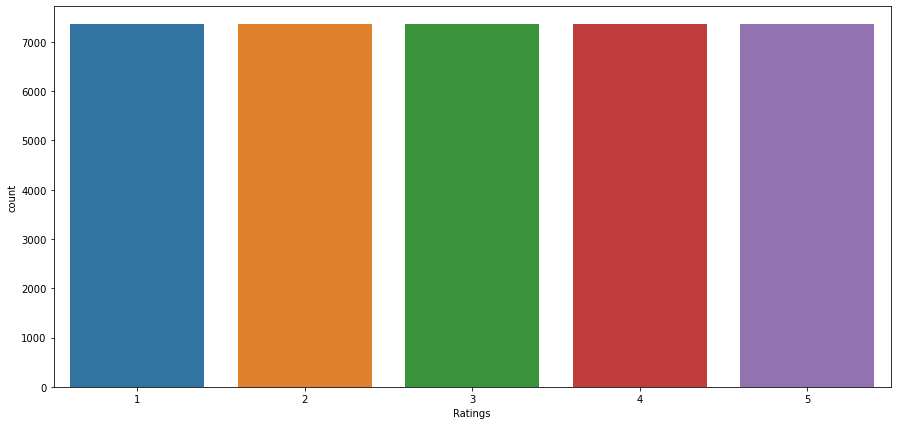

In [43]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Great! we have balanced our data successfully.

### Top 30 most frequently occuring words

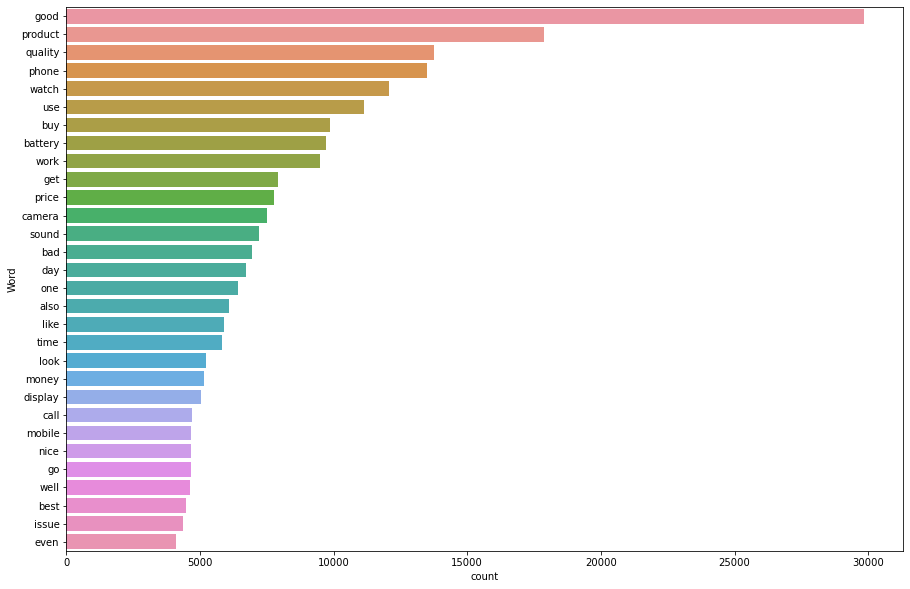

In [44]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

### Top 30 rarely occuring words

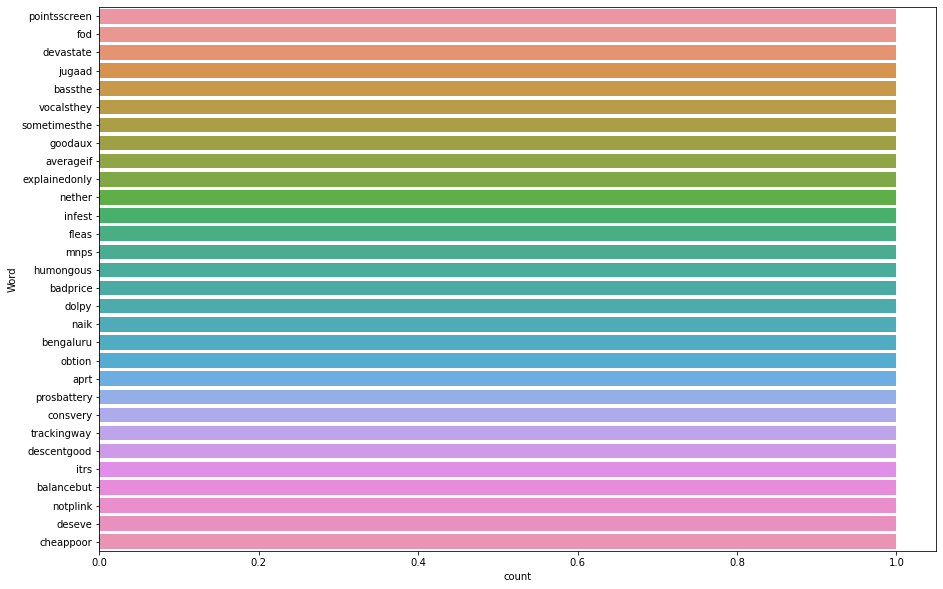

In [45]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])    

# Model Building and Evaluation Metrics

In [46]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

### Converting text into vectors using TfidfVectorizer

In [47]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

### Splitting the data into train and test datasets

In [48]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (25746, 150000)
x_test (11034, 150000)
y_train (25746,)
y_test (11034,)


In [49]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [50]:
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 70.59090085191228
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.73      0.78      0.75      2227
           2       0.62      0.62      0.62      2184
           3       0.63      0.61      0.62      2181
           4       0.70      0.71      0.70      2210
           5       0.86      0.81      0.83      2232

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034

CONFUSION MATRIX: 
 [[1741  319  128   33    6]
 [ 406 1358  317   78   25]
 [ 165  376 1321  267   52]
 [  53  116  266 1564  211]
 [  23   32   72  300 1805]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

We can see that the accuracy scores for the algorithms above and we shall cross validate them to choose the best scored classification algorithm amongst them.

# Cross validation score for best score models

In [51]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 69.66286025013595


******************************LinearSVC******************************
Cross validation score: 69.81783578031539


******************************BernoulliNB******************************
Cross validation score: 50.570962479608475


******************************MultinomialNB******************************
Cross validation score: 62.778684067427946


******************************SGDClassifier******************************
Cross validation score: 69.43175638934203


******************************RandomForestClassifier******************************
Cross validation score: 70.24197933659599


******************************LGBMClassifier******************************
Cross validation score: 69.76889613920609




In the above cell we cross validated the algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I can see that **RandomForestClassifier** has produced the best outcome and we shall use it for further tuning the accuracy percentage.

# HyperParameter Tuning

In [52]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.670 total time= 2.2min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.672 total time= 2.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.673 total time= 2.2min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.672 total time= 4.3min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.675 total time= 4.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.676 total time= 4.4min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.672 total time= 2.2min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.675 total time= 2.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [53]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 800,
 'n_estimators': 200}

In [55]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 71.1799891245242

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.72      0.82      0.77      2227
           2       0.67      0.59      0.63      2184
           3       0.64      0.62      0.63      2181
           4       0.70      0.71      0.71      2210
           5       0.82      0.81      0.82      2232

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034


CONFUSION MATRIX: 
 [[1830  222  114   45   16]
 [ 446 1296  301   95   46]
 [ 191  296 1344  255   95]
 [  50   87  260 1573  240]
 [  35   38   74  274 1811]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

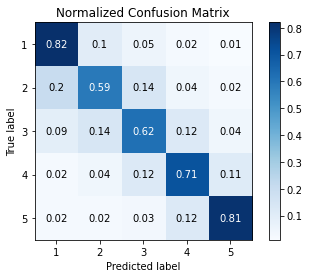

In [56]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

# Saving the best model

In [57]:
joblib.dump(best_model, "Ratings_Prediction_Saved_Model.pkl")

['Ratings_Prediction_Saved_Model.pkl']

# Loading the final model

In [58]:
Model = joblib.load("Ratings_Prediction_Saved_Model.pkl")

In [59]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,3,3
1,2,3
2,3,1
3,2,5
4,4,3
...,...,...
11029,1,4
11030,3,1
11031,1,2
11032,1,2


In [60]:
# Converting the dataframe into CSV format and saving it
results.to_csv('Predicted_vs_Actual_Ratings_Results.csv', index=False)

# Inference:

`Key findings of the study:`
In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com. Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance. By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words. After all these steps I have built function to train and test different algorithms and using various evaluation metrics I have selected Random Forest Classifier for our final model. Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got improved accuracy score for our final model.

`Limitations of this work and scope for the future work:`
As we know the content of text in reviews is totally depends on the reviewer and they may rate differently which is totally depends on that particular person. So it is difficult to predict ratings based on the reviews with higher accuracies. Still we can improve our accuracy by fetching more data and by doing extensive hyperparameter tuning.

`Areas of improvement:`
- Less time complexity
- More computational power can be given
- More accurate reviews can be given
- Many more permutations and combinations in hyper paramter tuning can be used to obtain better parameter list

`Final Remarks:`
After applying the hyper parameter tuning the best accuracy score obtained was **71.179989%** which can be further improved by obtaining more data and working up through other parameter combinations.